###DeepWalk Algorithm using Karate Club

In [2]:
"importing libraries "
import networkx as nx
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [3]:
G = nx.karate_club_graph() # load the Zachary's karate club graph
print('Number of nodes (club-members): ', len(G.nodes))


Number of nodes (club-members):  34


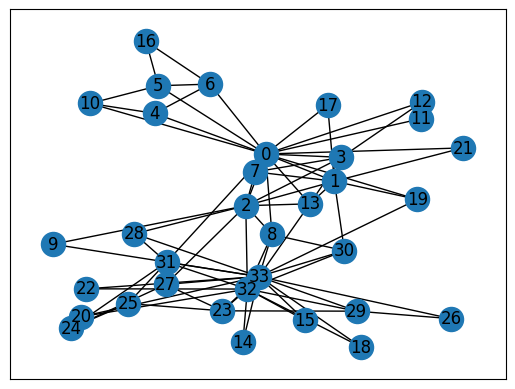

In [3]:
nx.draw_networkx(G)

In [4]:
" plot the graph with labels"
labels = []
for i in G.nodes:
    club_names = G.nodes[i]['club']
    labels.append(1 if club_names == 'Officer' else 0) #Clubs: 'Officer' or 'Mr.Hi'


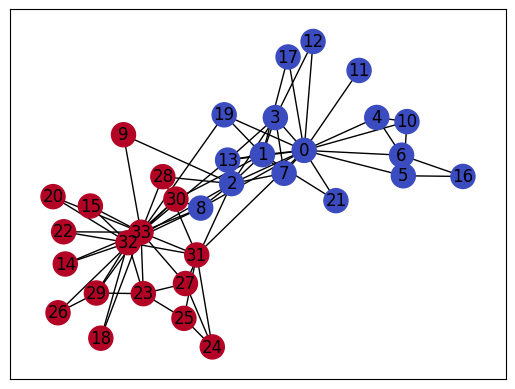

In [5]:
layout_pos = nx.spring_layout(G)
nx.draw_networkx(G,pos = layout_pos ,node_color = labels, cmap='coolwarm')


In [6]:
!pip install karateclub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 89.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 90.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 k

In [1]:
!pip install --upgrade --force-reinstall numpy==1.23.5
!pip install --upgrade pandas
!pip install --upgrade karateclub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 72.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
karateclub 1.3.3 requires numpy<1.23.0, but you have numpy 1.23.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.3.5 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.3.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.3.5 which is incompatible.
nx-cugraph-cu12 25.2.0 requires networkx>=3.2, but yo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 45.7 MB/s eta 0:00:00
ERROR: Operation cancelled by user
^C
^C


In [1]:
from karateclub import DeepWalk

In [5]:
" Perform node embedding using DeepWalk "
Deepwalk_model = DeepWalk(walk_number=10, walk_length=80, dimensions=124)
Deepwalk_model.fit(G)
embedding = Deepwalk_model.get_embedding()
print('Embedding array shape (nodes x features):',embedding.shape )


Embedding array shape (nodes x features): (34, 124)


Low dimensional embedding representaiton (nodes x 2): (34, 2)


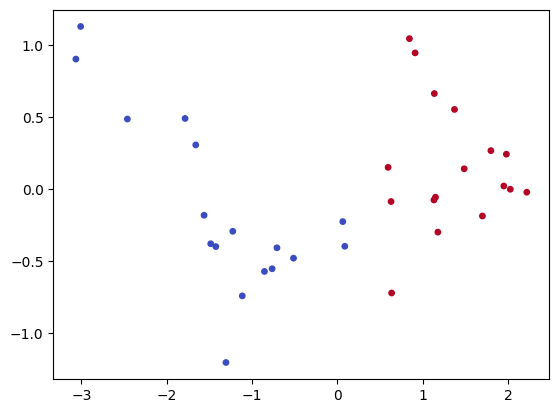

In [6]:
" Low dimensional plot of the neodes x features"

PCA_model = sklearn.decomposition.PCA(n_components=2)
lowdimension_embedding = PCA_model.fit_transform(embedding)
print('Low dimensional embedding representaiton (nodes x 2):', lowdimension_embedding.shape)
plt.scatter(lowdimension_embedding[:,0],lowdimension_embedding[:,1],c=labels,
            s=15,cmap='coolwarm')


In [7]:
" Node classification using embedded model"
x_train,x_test,y_train,y_test = train_test_split(embedding, labels, test_size=0.3)
ML_model = LogisticRegression(random_state=0).fit(x_train,y_train)
y_predict = ML_model.predict(x_test)
ML_acc = roc_auc_score(y_test,y_predict)
print('AUC:',ML_acc)


AUC: 0.9
